In [2]:
############################################## Importing Libraries ##############################################

In [140]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report , recall_score ,  precision_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier


In [141]:
############################################## Data Loading Starts Here #############################################

In [142]:
#Lets prepare our data for modeling
flight_details_janury_2019 = pd.read_csv('Flights_Jan_2019_ontime.csv')
flight_details_janury_2019.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN


In [143]:
############################################## Data Preparation Starts Here #############################################

In [144]:
# check the columns
flight_details_janury_2019.columns

Index(['DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER',
       'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN',
       'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST', 'DEP_TIME',
       'DEP_DEL15', 'DEP_TIME_BLK', 'ARR_TIME', 'ARR_DEL15', 'CANCELLED',
       'DIVERTED', 'DISTANCE', 'Unnamed: 21'],
      dtype='object')

In [145]:
# check type of columns:
flight_details_janury_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583985 entries, 0 to 583984
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DAY_OF_MONTH           583985 non-null  int64  
 1   DAY_OF_WEEK            583985 non-null  int64  
 2   OP_UNIQUE_CARRIER      583985 non-null  object 
 3   OP_CARRIER_AIRLINE_ID  583985 non-null  int64  
 4   OP_CARRIER             583985 non-null  object 
 5   TAIL_NUM               581442 non-null  object 
 6   OP_CARRIER_FL_NUM      583985 non-null  int64  
 7   ORIGIN_AIRPORT_ID      583985 non-null  int64  
 8   ORIGIN_AIRPORT_SEQ_ID  583985 non-null  int64  
 9   ORIGIN                 583985 non-null  object 
 10  DEST_AIRPORT_ID        583985 non-null  int64  
 11  DEST_AIRPORT_SEQ_ID    583985 non-null  int64  
 12  DEST                   583985 non-null  object 
 13  DEP_TIME               567633 non-null  float64
 14  DEP_DEL15              567630 non-nu

In [146]:
#We want to predict if someflight will delayed in any time - arrival or departure. So lets create new classifier, named under "delayed" with 2 result
#Delayed - 1 the flight will delay
#Delayed - 0 the flight will not delay
flight_details_janury_2019['DELAYED'] = (flight_details_janury_2019['ARR_DEL15'].astype(bool) | 
                                         flight_details_janury_2019['DEP_DEL15'].astype(bool)).astype(int)

In [147]:
#We want to remove the canceled and diverted flights, because we are looking for flights that succesfuly departed
print("The number of rows before deleted 'Cancelled' column and `DIVERTED` is " + str(flight_details_janury_2019.shape[0]) )
df[(len(df['column name']) < 2)]
flight_details_janury_2019.drop((len(flight_details_janury_2019[flight_details_janury_2019.CANCELLED == 1].index, inplace=True)

flight_details_janury_2019.drop(flight_details_janury_2019[flight_details_janury_2019.DIVERTED == 1].index, inplace=True)

print("The number of rows after deleted 'Cancelled' column and `DIVERTED` is " + str(flight_details_janury_2019.shape[0]) )

The number of rows before deleted 'Cancelled' column and `DIVERTED` is 583985
The number of rows after deleted 'Cancelled' column and `DIVERTED` is 565963


In [148]:
#Lets get rid of unuseful columns, that not impact on our results
flight_details_janury_2019.drop(['OP_CARRIER_AIRLINE_ID','TAIL_NUM','OP_CARRIER_FL_NUM',
                                 'ORIGIN_AIRPORT_ID','ORIGIN_AIRPORT_SEQ_ID','DEST_AIRPORT_ID','DEST_AIRPORT_SEQ_ID',
                                 'Unnamed: 21','OP_CARRIER','ARR_DEL15','DEP_DEL15','CANCELLED', 'DIVERTED'], axis='columns',
                                inplace=True)

In [149]:
#Lets check distribution of our target variable
flight_details_janury_2019['DELAYED'].value_counts()

0    440724
1    125239
Name: DELAYED, dtype: int64

In [150]:
#We can see that there are very highly difference between the rows with value 1 and 0 , so we should decrease our rows with value 0.
# Split the data into positive and negative
pos = flight_details_janury_2019.loc[flight_details_janury_2019.DELAYED == 1]
neg = flight_details_janury_2019.loc[flight_details_janury_2019.DELAYED == 0]

# Merge the balanced data
data = pd.concat([pos, neg.sample(n = len(pos))], axis = 0)

# Shuffle the order of data
flight_details_janury_2019 = data.sample(n = len(data)).reset_index(drop = True)

In [151]:
#Lets rename names if needed for more readble
flight_details_janury_2019 = flight_details_janury_2019.rename(columns={"OP_UNIQUE_CARRIER": "AIRLINE_CODE"})

In [152]:
#Check for some Null/Na values
flight_details_janury_2019.isna().sum()

DAY_OF_MONTH    0
DAY_OF_WEEK     0
AIRLINE_CODE    0
ORIGIN          0
DEST            0
DEP_TIME        0
DEP_TIME_BLK    0
ARR_TIME        0
DISTANCE        0
DELAYED         0
dtype: int64

In [153]:
#now we dont have any null values

In [154]:
print("Our final data include: " + str(flight_details_janury_2019.shape[0]) + " Rows and " + str(flight_details_janury_2019.shape[1]) + " Columns" )

Our final data include: 250478 Rows and 10 Columns


In [155]:
 flight_details_janury_2019.head()

,DAY_OF_MONTH,DAY_OF_WEEK,AIRLINE_CODE,ORIGIN,DEST,DEP_TIME,DEP_TIME_BLK,ARR_TIME,DISTANCE,DELAYED
0,2,3,OH,CLT,SYR,914.0,0900-0959,1100.0,603.0,0
1,30,3,DL,OGG,LAX,1651.0,1300-1359,2400.0,2486.0,1
2,24,4,EV,TUL,IAH,1150.0,1200-1259,1323.0,429.0,0
3,6,7,DL,LAX,JFK,2148.0,2100-2159,544.0,2475.0,1
4,8,2,OO,ORD,DTW,1420.0,1300-1359,1644.0,235.0,1


In [156]:
############################################## Data Preparation Ends Here #############################################

array([[<AxesSubplot:title={'center':'DAY_OF_MONTH'}>,
        <AxesSubplot:title={'center':'DAY_OF_WEEK'}>],
       [<AxesSubplot:title={'center':'DEP_TIME'}>,
        <AxesSubplot:title={'center':'ARR_TIME'}>],
       [<AxesSubplot:title={'center':'DISTANCE'}>,
        <AxesSubplot:title={'center':'DELAYED'}>]], dtype=object)

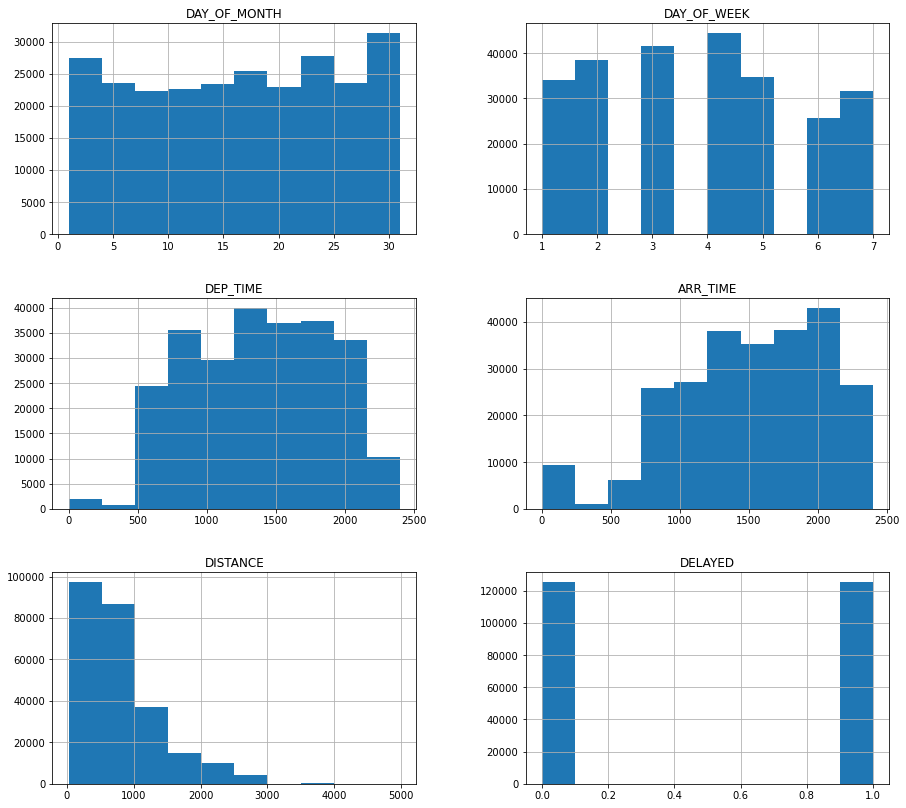

In [157]:
#Exploratory Data Analysis
flight_details_janury_2019.hist(figsize= (15, 14))

In [158]:
 flight_details_janury_2019.describe()

,DAY_OF_MONTH,DAY_OF_WEEK,DEP_TIME,ARR_TIME,DISTANCE,DELAYED
count,250478.000000,250478.000000,250478.000000,250478.000000,250478.000000,250478.000000
mean,15.974892,3.840593,1384.637461,1512.132503,811.075104,0.500000
std,9.024572,1.913834,497.512890,548.987156,593.689879,0.500001
min,1.000000,1.000000,1.000000,1.000000,31.000000,0.000000
25%,8.000000,2.000000,959.000000,1130.000000,370.000000,0.000000
50%,16.000000,4.000000,1414.000000,1552.000000,651.000000,0.500000
75%,24.000000,5.000000,1808.000000,1946.000000,1050.000000,1.000000
max,31.000000,7.000000,2400.000000,2400.000000,4983.000000,1.000000


In [159]:
#First Lets see if there some dfference between airline companies delay, due to result we can understand if there problem with spesific company

<AxesSubplot:xlabel='AIRLINE_CODE'>

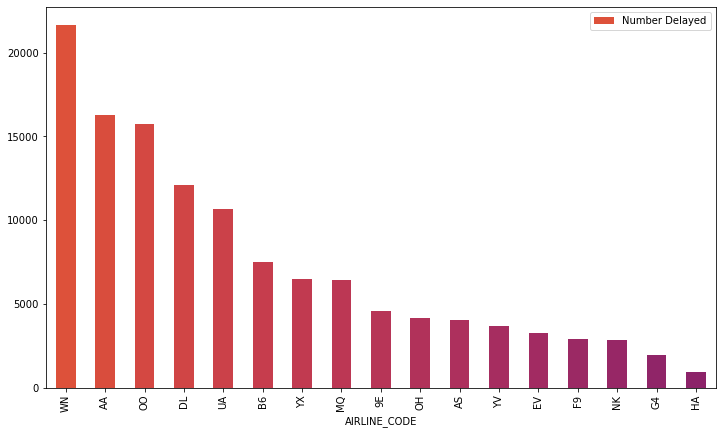

In [160]:
# Count delayed by company
count_delayed=flight_details_janury_2019.groupby('AIRLINE_CODE')['DELAYED'].apply(lambda x: (x==1).sum()).reset_index(name='Number Delayed')

color = cm.inferno_r(np.linspace(.4, .8, 30))

count_delayed= count_delayed.sort_values("Number Delayed" , ascending=[False])
count_delayed.plot.bar(x='AIRLINE_CODE', y='Number Delayed', color=color , figsize=(12,7))

In [161]:
#Correlation between the day of the month to number of delays

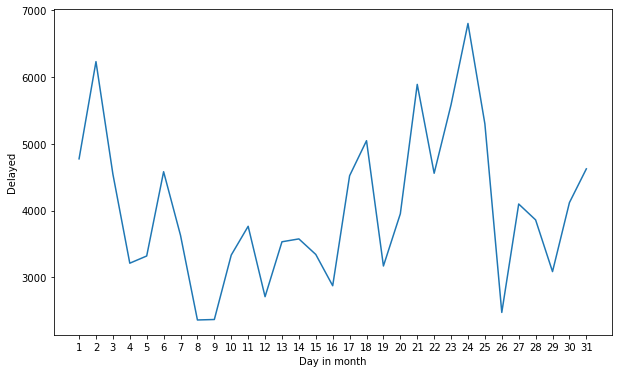

In [162]:
monthly_days_delayed=flight_details_janury_2019.groupby('DAY_OF_MONTH')['DELAYED'].apply(lambda x: (x==1).sum()).reset_index(name='Number Delayed')
plt.figure(figsize=(10, 6))
plt.xticks(monthly_days_delayed['DAY_OF_MONTH'])
plt.plot(monthly_days_delayed['DAY_OF_MONTH'],monthly_days_delayed['Number Delayed'])
plt.ylabel('Delayed')
plt.xlabel('Day in month')
plt.show()

In [163]:
#Now lets see if there any corellation between the distance and delays

Avergae Distance with delay: 828.707846597306 mile
Avergae Distance without delay: 793.4423622034669 mile


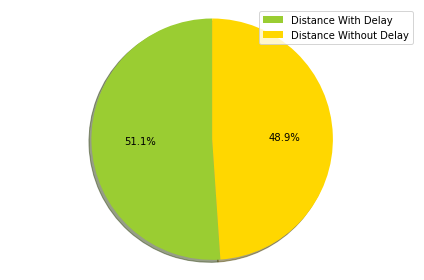

In [177]:
#Calculate the precent of delays with average distance:
avg_distance_delay = flight_details_janury_2019[flight_details_janury_2019['DELAYED'] == 1]['DISTANCE'].values.mean()
#Calculate the precent of delays without average distance:
avg_distance_without_delay = flight_details_janury_2019[flight_details_janury_2019['DELAYED'] == 0]['DISTANCE'].values.mean()

print("Avergae Distance with delay: " + str(avg_distance_delay) + " mile")
print("Avergae Distance without delay: "+ str(avg_distance_without_delay) +" mile")

labels = ['Distance With Delay', 'Distance Without Delay']
sizes = [avg_distance_delay,avg_distance_without_delay]
colors = ['yellowgreen', 'gold']
texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90, autopct='%1.1f%%')
plt.legend(labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [165]:
#Let's see in which day are the higher number of delays:=

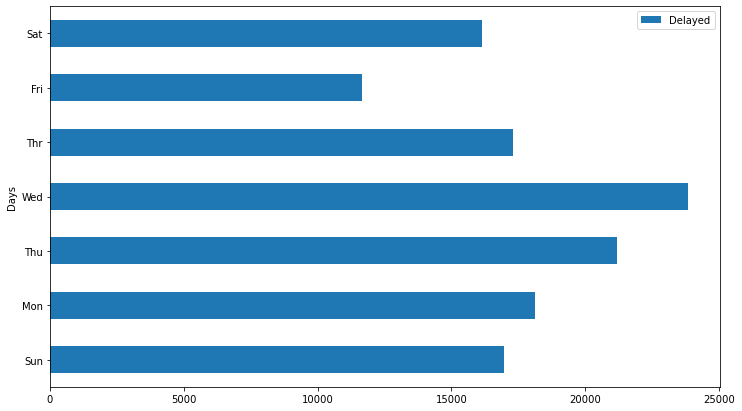

In [166]:
# Create the data for the days adays_values
days_values = flight_details_janury_2019.groupby('DAY_OF_WEEK')['DELAYED'].apply(lambda x: (x==1).sum()).reset_index(name='Number Delayed')
days_values.sort_values("DAY_OF_WEEK" )

days_values['DAY_OF_WEEK'] = days_values['DAY_OF_WEEK'].map({1: 'Sun', 2: 'Mon', 3:'Thu',4:'Wed',5:'Thr',6:'Fri',7:'Sat'})

df = pd.DataFrame({'Days':days_values['DAY_OF_WEEK'],'Delayed':days_values['Number Delayed']})
ax = df.plot.barh(x='Days',y='Delayed',figsize=(12,7))

In [167]:
#We have to encode our categorial Variabels before we move to modeling:

# OP_UNIQUE_CARRIER
# ORIGIN
# DEST
# DEST_TIME_BLK

In [168]:
def encode_categories(features):
    lb_make = LabelEncoder()
    for i in range(len(features)):
        flight_details_janury_2019[features[i]] = lb_make.fit_transform(flight_details_janury_2019[features[i]])

In [169]:
encode_categories(['AIRLINE_CODE','ORIGIN','DEST','DEP_TIME_BLK',])
flight_details_janury_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250478 entries, 0 to 250477
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   DAY_OF_MONTH  250478 non-null  int64  
 1   DAY_OF_WEEK   250478 non-null  int64  
 2   AIRLINE_CODE  250478 non-null  int32  
 3   ORIGIN        250478 non-null  int32  
 4   DEST          250478 non-null  int32  
 5   DEP_TIME      250478 non-null  float64
 6   DEP_TIME_BLK  250478 non-null  int32  
 7   ARR_TIME      250478 non-null  float64
 8   DISTANCE      250478 non-null  float64
 9   DELAYED       250478 non-null  int32  
dtypes: float64(3), int32(5), int64(2)
memory usage: 14.3 MB


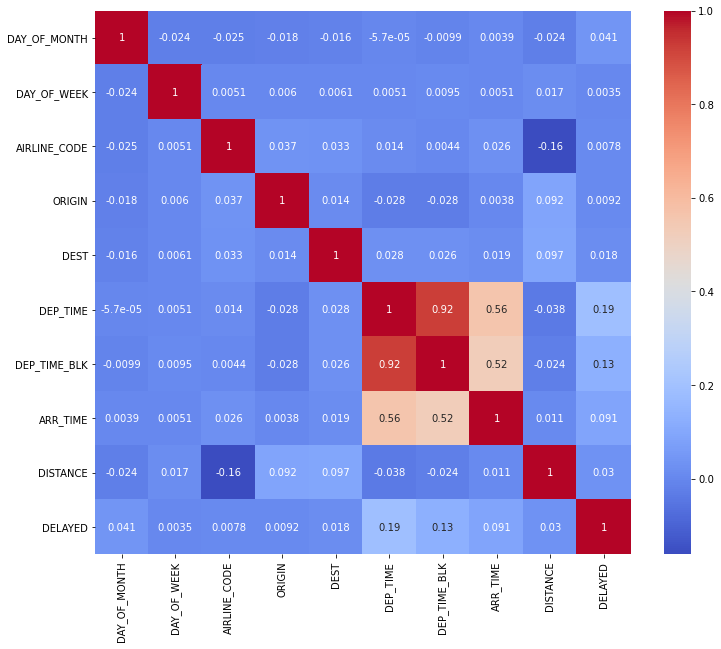

In [170]:
#Collerations between our features
plt.figure(figsize = (12, 10))
sns.heatmap(flight_details_janury_2019.corr(), annot = True, cmap = 'coolwarm')
plt.show()

In [138]:
########################################### MODELING ###########################################

In [178]:
# Create test and train:
feature_names = ['DAY_OF_MONTH','DAY_OF_WEEK','AIRLINE_CODE','ORIGIN','DEST','DEP_TIME','DEP_TIME_BLK','ARR_TIME','DISTANCE']
X =  flight_details_janury_2019[feature_names].values
y =  flight_details_janury_2019['DELAYED'].values

In [88]:
# SPLIT THE DATA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [89]:
### DECISION TREE

In [171]:
dt = DecisionTreeClassifier(max_depth=15)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=15)

In [172]:
### ADA BOOST CLASSIFIER

In [173]:
ab = AdaBoostClassifier()
ab.fit(X_train, y_train)

AdaBoostClassifier()

In [93]:
########################################### EVALUATION ###########################################

In [94]:
#Evaluating of accuarcy of our models

In [95]:
# Acurracy of each model
def get_accuracy(model):
        pred = model[0].predict(X_test)
        check_overfitting(model)
        return accuracy_score(y_test, pred)

In [96]:
def check_overfitting(model):
        pred = model[0].predict(X_test)
        over_fit_check_pred = model[0].predict(X_train)
        print('Checking '+ model[1] + ' Overffiting:')
        print('Train Accuracy ' + str(accuracy_score(y_train, over_fit_check_pred)))
        print('Test Accuracy ' + str(accuracy_score(y_test, pred)))
        print('--------------------------')

In [105]:
# Plot the confusion matrix for each model:
def get_confusion_matrix(model):
    from sklearn.metrics import plot_confusion_matrix
    class_names=['Delay-False','Delay-true']
    disp = plot_confusion_matrix(model[0], X_test, y_test,
                                     display_labels=class_names, values_format='d',
                                     cmap=model[2])
    precision = precision_score(y_test, model[0].predict(X_test), average='binary')
    recall = recall_score(y_test, model[0].predict(X_test), average='binary')
    print('Avg Precision:' +  str(precision))
    print('Avg Recall:' + str(recall))
    
    disp.ax_.set_title(model[1])
    plt.show()

In [98]:
### Save the accuracy
models = [[dt,'Decision Tree',plt.cm.Reds],[ab,'AdaBoost',plt.cm.Oranges]]
accuracy = []
for model in models:
    accuracy.append(get_accuracy(model))

Checking Decision Tree Overffiting:
Train Accuracy 0.7642898696202676
Test Accuracy 0.7256068348770361
--------------------------
Checking AdaBoost Overffiting:
Train Accuracy 0.6654100174524051
Test Accuracy 0.6640583413180028
--------------------------


Avg Precision:0.806687978161704
Avg Recall:0.5957926570458404


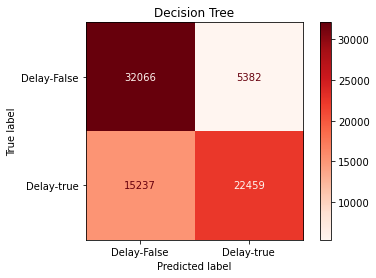

Avg Precision:0.6679162845892443
Avg Recall:0.6569662563667232


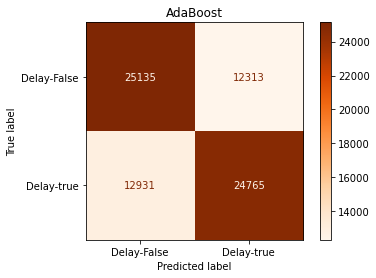

In [99]:
#Show the confusion matrix for each model with Recall and Precision
for model in models:
    get_confusion_matrix(model)

In [100]:
#Plot accurcay of each model

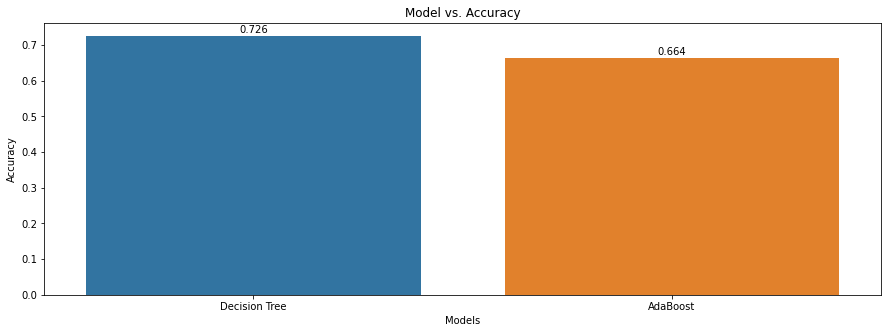

In [101]:
plt.figure(figsize=(15,5))
model_names = ['Decision Tree','AdaBoost']
ax = sns.barplot(x = model_names, y =accuracy)

accuracy_dic = dict(zip(model_names, accuracy))

for p, value in zip(ax.patches, list(accuracy_dic.values())):
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height() + 0.008
    ax.text(_x, _y, round(value, 3), ha="center") 

plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model vs. Accuracy")
plt.show()

In [179]:
print(classification_report(y_test, dt.predict(X_test), target_names=['Delayed','Not Delayed']))

              precision    recall  f1-score   support

     Delayed       0.68      0.86      0.76     37448
 Not Delayed       0.81      0.60      0.68     37696

    accuracy                           0.73     75144
   macro avg       0.74      0.73      0.72     75144
weighted avg       0.74      0.73      0.72     75144



In [180]:
print(classification_report(y_test, ab.predict(X_test), target_names=['Delayed','Not Delayed']))

              precision    recall  f1-score   support

     Delayed       0.66      0.67      0.67     37448
 Not Delayed       0.67      0.66      0.66     37696

    accuracy                           0.66     75144
   macro avg       0.66      0.66      0.66     75144
weighted avg       0.66      0.66      0.66     75144



In [104]:
####################################################### END :) ##########################################################